In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pystan
%matplotlib inline
pallete = sns.col

In [124]:
df1 = pd.read_csv("input/data-ss1.txt")

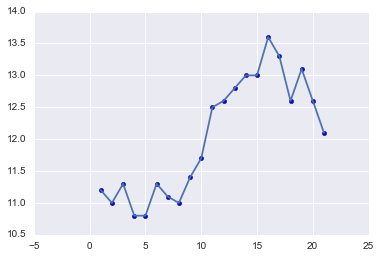

In [125]:
plt.scatter(df1.X, df1.Y)
plt.plot(df1.X, df1.Y)

In [126]:
data1 = {"T":len(df1), "T_pred":3, "Y":df1.Y}
fit1 = pystan.stan(file="stan/model12-2.stan",data=data1,seed=1234)

In [127]:
fit1

Inference for Stan model: anon_model_f381c62f14df9577865314cec7045f35.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[0]       11.18  2.4e-3   0.15  10.83   11.1  11.19  11.26  11.49   4000    1.0
mu[1]       11.05  2.2e-3   0.14  10.79  10.97  11.03  11.12  11.38   4000    1.0
mu[2]       11.22  5.0e-3   0.15  10.87  11.13  11.24  11.31  11.47    854    1.0
mu[3]       10.86  4.3e-3   0.15   10.6  10.78  10.84  10.94   11.2   1160    1.0
mu[4]       10.87  3.9e-3   0.15   10.6  10.78  10.84  10.94  11.21   1458    1.0
mu[5]       11.22  5.0e-3   0.15  10.88  11.13  11.25  11.32  11.48    877    1.0
mu[6]       11.12  2.3e-3   0.14  10.82  11.04  11.11  11.19  11.43   4000    1.0
mu[7]       11.08  6.5e-3   0.15  10.82  10.99  11.05  11.16  11.45    559    1.0
mu[8]       11.42  2.4e-3   0.15  11.11  11.34   11.4  11.49  11.76   400

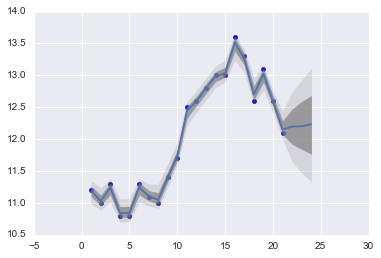

In [128]:
ms1 = fit1.extract()
y_pred_1 = ms1["y_pred"].T
mu_all_1 =  ms1["mu_all"].T
y1_10, y1_25,y1_50,y1_75,y1_90 = np.percentile(mu_all_1,[10,25,50,75,90],axis=1)
plt.scatter(df1.X, df1.Y)
plt.plot(np.arange(1,25), y1_50)
plt.fill_between(np.arange(1,25), y1_10, y1_90,color="gray", alpha=0.2)
plt.fill_between(np.arange(1,25), y1_25, y1_75,color="gray", alpha=0.7)

二階差分トレンド

In [35]:
fit2 = pystan.stan(file="stan/model12-4.stan",data=data1,seed=1234)

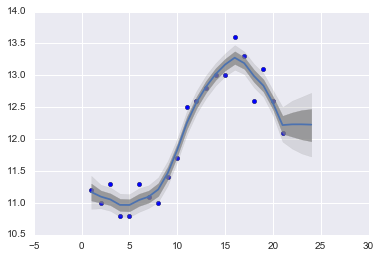

In [39]:
ms2 = fit2.extract()
y_pred_2 = ms2["y_pred"].T
mu_all_2 =  ms2["mu_all"].T
y2_10, y2_25,y2_50,y2_75,y2_90 = np.percentile(mu_all_2,[10,25,50,75,90],axis=1)
plt.scatter(df1.X, df1.Y)
plt.plot(np.arange(1,25), y2_50)
plt.fill_between(np.arange(1,25), y2_10, y2_90,color="gray", alpha=0.2)
plt.fill_between(np.arange(1,25), y2_25, y2_75,color="gray", alpha=0.7)

#### 12.2 季節調整

In [152]:
df2 = pd.read_csv("input/data-ss2.txt")

In [41]:
df2.head()

,X,Y
0,1,18.073
1,2,23.665
2,3,16.410
3,4,14.931
4,5,17.106


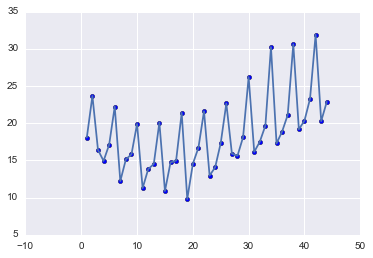

In [44]:
plt.scatter(df2.X,df2.Y)
plt.plot(df2.X,df2.Y)

In [48]:
T = len(df2)
data2 = {"T":T, "Y":df2.Y}
fit3 = pystan.stan(file="stan/model12-6.stan",data=data2,seed=1234)

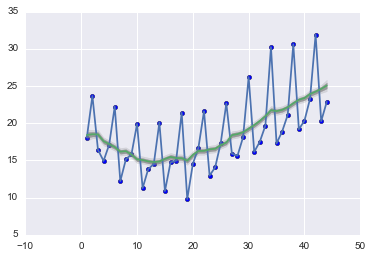

In [50]:
ms3 = fit3.extract()
mu3 =  ms3["mu"].T
mu3_10, mu3_25,mu3_50,mu3_75,mu3_90 = np.percentile(mu3,[10,25,50,75,90],axis=1)
plt.scatter(df2.X, df2.Y)
plt.plot(df2.X, df2.Y)
plt.plot(np.arange(1,T+1), mu3_50)
plt.fill_between(np.arange(1,T+1), mu3_10, mu3_90,color="gray", alpha=0.2)
plt.fill_between(np.arange(1,T+1), mu3_25, mu3_75,color="gray", alpha=0.7)

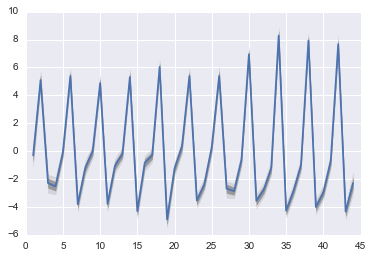

In [51]:
mu3 =  ms3["season"].T
mu3_10, mu3_25,mu3_50,mu3_75,mu3_90 = np.percentile(mu3,[10,25,50,75,90],axis=1)
plt.plot(np.arange(1,T+1), mu3_50)
plt.fill_between(np.arange(1,T+1), mu3_10, mu3_90,color="gray", alpha=0.2)
plt.fill_between(np.arange(1,T+1), mu3_25, mu3_75,color="gray", alpha=0.7)

#### 12.3変化点検出

In [52]:
df3 = pd.read_csv("input/data-changepoint.txt")

In [53]:
df3.head()

,X,Y
0,1,-0.25
1,2,1.92
2,3,-0.57
3,4,-1.41
4,5,-0.90


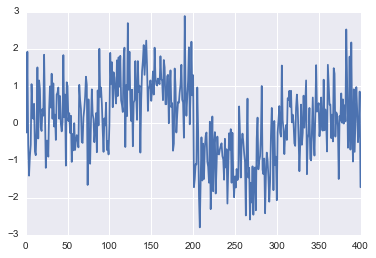

In [55]:
plt.plot(df3.X, df3.Y)

In [57]:
T = len(df3)
data3 = {"T":T, "Y":df3.Y}
fit4 = pystan.stan(file="stan/model12-7.stan",data=data3,seed=1234)

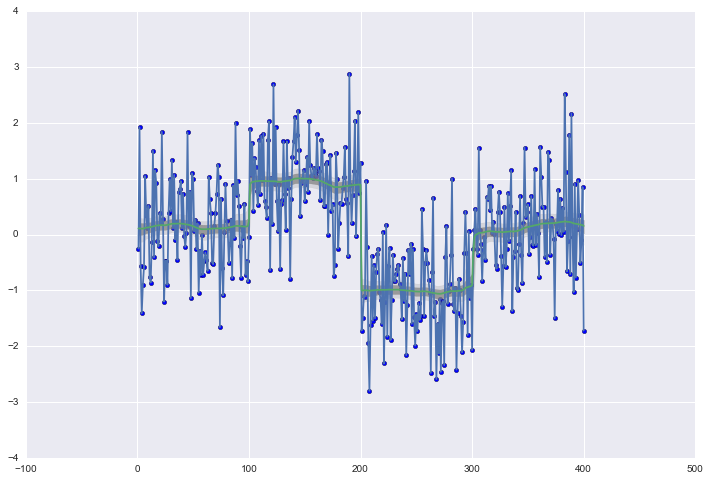

In [59]:
plt.figure(figsize=(12,8))
ms4 = fit4.extract()
mu4 =  ms4["mu"].T
mu4_10, mu4_25,mu4_50,mu4_75,mu4_90 = np.percentile(mu4,[10,25,50,75,90],axis=1)
plt.scatter(df3.X, df3.Y)
plt.plot(df3.X, df3.Y)
plt.plot(np.arange(1,T+1), mu4_50)
plt.fill_between(np.arange(1,T+1), mu4_10, mu4_90,color="gray", alpha=0.2)
plt.fill_between(np.arange(1,T+1), mu4_25, mu4_75,color="gray", alpha=0.7)

#### 12.6 １次元の空間構造

In [60]:
df6 = pd.read_csv("input/data-kubo11a.txt")

In [61]:
df6.head()

,Y
0,0
1,3
2,2
3,5
4,6


In [62]:
data6 ={"I":len(df6), "Y":df6.Y}
fit6 = pystan.stan(file="stan/model12-11.stan",data=data6,seed=1234)

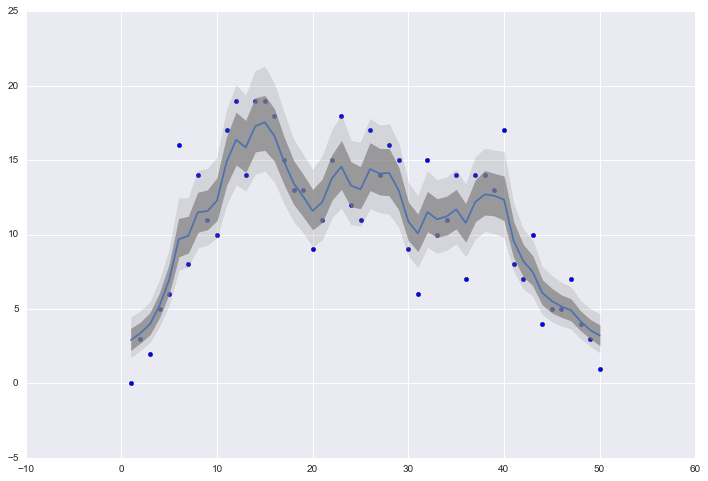

In [63]:
plt.figure(figsize=(12,8))
I = np.arange(1,len(df6) + 1)
ms6 = fit6.extract()
mu6 =  ms6["Y_mean"].T
mu6_10, mu6_25,mu6_50,mu6_75,mu6_90 = np.percentile(mu6,[10,25,50,75,90],axis=1)
plt.scatter(I, df6.Y)
plt.plot(I, mu6_50)
plt.fill_between(I, mu6_10, mu6_90,color="gray", alpha=0.2)
plt.fill_between(I, mu6_25, mu6_75,color="gray", alpha=0.7)

In [66]:
fit7 = pystan.stan(file="stan/model12-12.stan",data=data6,seed=1234)

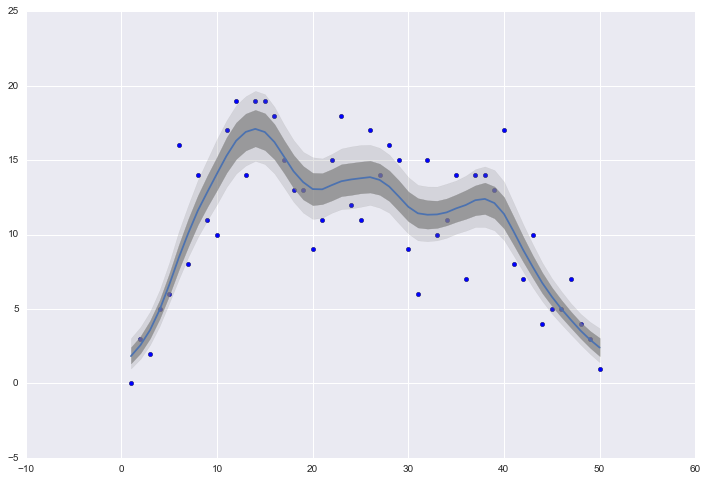

In [67]:
plt.figure(figsize=(12,8))
I = np.arange(1,len(df6) + 1)
ms6 = fit7.extract()
mu6 =  ms6["Y_mean"].T
mu6_10, mu6_25,mu6_50,mu6_75,mu6_90 = np.percentile(mu6,[10,25,50,75,90],axis=1)
plt.scatter(I, df6.Y)
plt.plot(I, mu6_50)
plt.fill_between(I, mu6_10, mu6_90,color="gray", alpha=0.2)
plt.fill_between(I, mu6_25, mu6_75,color="gray", alpha=0.7)

#### 12.7 2次元の空間構造

In [5]:
df_mesh = pd.read_csv("input/data-2Dmesh.txt",header=None)
df_design = pd.read_csv("input/data-2Dmesh-design.txt",header=None)

In [6]:
df_mesh

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.09,1.16,0.63,1.36,3.08,4.04,2.68,4.72,3.61,4.65,...,2.64,3.09,2.12,1.97,3.49,2.22,2.50,1.54,1.83,2.06
1,1.39,1.85,0.49,1.88,2.54,3.75,3.86,5.80,4.31,4.86,...,2.51,3.02,5.32,2.90,1.78,3.18,6.32,1.17,1.54,0.01
2,-0.81,2.24,0.27,2.81,4.16,3.46,6.18,8.22,5.08,4.32,...,2.75,6.12,3.49,3.15,6.03,5.03,3.64,3.91,2.48,2.86
3,2.72,1.46,1.28,4.64,4.98,5.50,6.28,6.53,5.99,7.05,...,3.45,5.19,4.53,6.14,7.07,4.30,5.19,4.94,2.30,2.30
4,0.87,-0.49,3.59,4.59,5.12,5.96,10.02,8.80,7.38,7.73,...,5.70,5.58,9.37,5.91,7.00,8.40,6.99,4.85,2.50,0.70
5,0.15,2.32,4.83,4.38,7.06,8.22,9.21,9.81,8.71,8.16,...,9.07,6.34,6.37,7.80,5.99,6.51,8.47,3.73,2.88,2.42
6,4.15,2.10,5.26,5.81,9.97,9.19,11.45,10.41,9.70,10.44,...,7.64,7.37,9.83,7.95,7.70,6.83,8.36,4.41,2.40,2.89
7,3.85,2.22,8.11,7.48,8.96,11.60,10.80,9.81,9.32,11.69,...,10.83,8.10,8.12,6.44,6.83,5.64,5.53,5.16,2.56,2.67
8,4.80,6.53,5.95,7.96,10.32,12.54,11.48,9.79,10.73,9.07,...,7.82,7.96,5.95,8.85,5.08,4.77,6.33,6.31,4.36,1.70
9,2.96,5.28,6.87,9.09,11.65,13.44,10.99,9.63,7.86,7.06,...,7.19,8.45,5.17,6.89,5.22,3.83,2.83,6.43,1.90,4.27


In [7]:
df_design

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,88,84,60,36,63,91,45,76,73,31,...,80,55,17,10,70,9,58,53,7,92
1,81,96,35,58,53,80,18,6,55,86,...,40,88,57,7,90,8,20,35,17,26
2,51,61,51,39,79,38,70,93,33,12,...,35,41,64,67,15,6,95,5,88,56
3,15,22,1,56,29,22,34,43,30,27,...,1,55,52,27,94,47,39,87,25,71
4,18,4,76,22,18,30,69,92,9,14,...,81,7,62,17,92,66,61,21,43,77
5,26,52,16,35,22,58,11,89,64,9,...,68,46,10,56,19,44,93,36,50,14
6,59,28,44,36,61,54,24,73,49,74,...,78,13,57,74,21,76,69,95,90,71
7,87,48,68,8,53,70,40,12,10,3,...,3,33,92,13,14,46,39,6,54,89
8,31,68,1,18,84,74,14,95,85,49,...,46,81,83,69,8,19,27,66,56,10
9,28,91,72,40,2,41,65,70,30,38,...,90,5,26,6,17,42,1,20,47,41


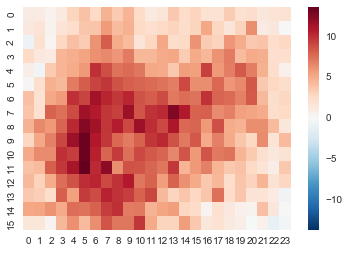

In [8]:
sns.heatmap(df_mesh)

In [16]:
data8 = {"I":len(df_mesh.index + 1), "J":len(df_mesh.columns + 1), "Y":df_mesh.values, "T":df_design.max().max(), "TID":df_design.values}
fit8 = pystan.stan(file="stan/model12-13.stan", data=data8, seed=1234)

In [113]:
fit8b = pystan.stan(file="stan/model12-13b.stan", data=data8, seed=1234)

In [163]:
fit8b

Inference for Stan model: anon_model_d659ea088cd1f287bcbdb9e52153c8bb.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
r[0,0]     0.98    0.02   0.31   0.37   0.78   0.98   1.19   1.59    267   1.01
r[1,0]     1.05    0.02   0.23   0.57   0.89   1.05    1.2    1.5    132   1.02
r[2,0]     1.08    0.02   0.23   0.62   0.93   1.08   1.23   1.51    127   1.03
r[3,0]     1.21    0.02   0.22   0.77   1.06   1.21   1.37   1.68    116   1.03
r[4,0]     1.38    0.02   0.22   0.95   1.23   1.38   1.53   1.82    125   1.03
r[5,0]      1.6    0.02   0.23   1.17   1.45    1.6   1.75   2.06    130   1.02
r[6,0]     1.96    0.02   0.23    1.5   1.81   1.96   2.12   2.41    139   1.02
r[7,0]     2.52    0.02   0.24   2.06   2.35   2.52   2.68   2.98    141   1.02
r[8,0]     3.12    0.02   0.23   2.68   2.97   3.12   3.28   3.59    140   1.02
r[9,0]     

###### 3Dプロット

In [20]:
from mpl_toolkits.mplot3d import Axes3D

In [114]:
ms8 = fit8b.extract()

In [115]:
r8 = ms8["r"]

In [116]:
Z = np.percentile(r8,[50],axis=0)[0]

In [117]:
x = np.arange(0,16)
y = np.arange(0,24)
X, Y = np.meshgrid(x,y)

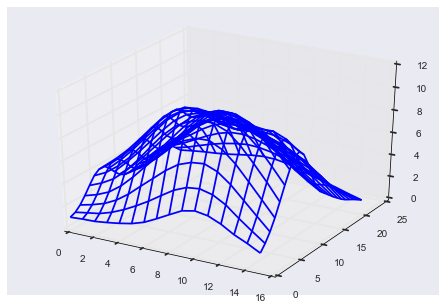

In [118]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X, Y, Z.T)

In [119]:
beta8 = ms8["beta"].T

In [120]:
beta8_low, beta8_med, beta8_upp = np.percentile(beta8,[2.5, 50,97.5],axis=1)

In [121]:
Y_mean = [df_mesh[df_design==t].mean().mean() - df_mesh.mean().mean() for t in range(1,97)]

<Container object of 3 artists>

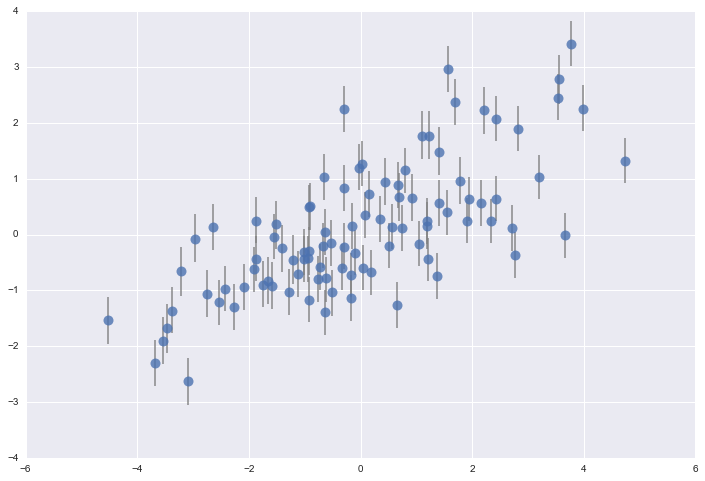

In [122]:
plt.figure(figsize=(12,8))
plt.errorbar(Y_mean,beta8_med, yerr=[beta8_med - beta8_low, beta8_upp - beta8_med],
    fmt='o', ecolor='gray', ms=10, alpha=0.8, marker='o')

#### 練習問題

In [133]:
s_mu = ms1["s_mu"]
s_Y = ms1["s_Y"]

s_mu_10, s_mu_90 = np.percentile(s_mu, [10,90])
s_Y_10, s_Y_90 = np.percentile(s_Y, [10,90])

In [143]:
# s_mu大, s_Y小
N = 5
T = 21
mu0 = 10
mu_sim = np.zeros((N, T))
mu_sim[:, 0] = mu0
y_sim = np.zeros((N, T))
y_sim[:, 0] = mu0
for n in range(N):
    for t in range(1,T):
        mu_sim[n,t] = np.random.normal(mu_sim[n,t-1], s_mu_90)
        y_sim[n,t] = np.random.normal(mu_sim[n,t], s_Y_10)
        

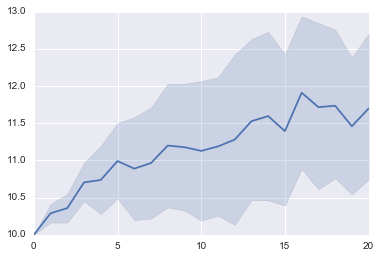

In [147]:
sns.tsplot(y_sim)

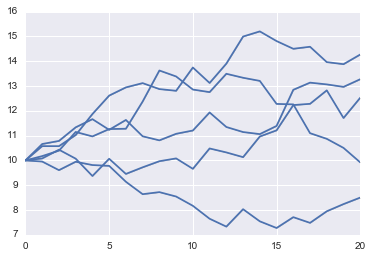

In [148]:
for i in range(N):
    sns.tsplot(y_sim[i])

In [149]:
# s_mu大, s_Y小
N = 5
T = 21
mu0 = 10
mu_sim = np.zeros((N, T))
mu_sim[:, 0] = mu0
y_sim = np.zeros((N, T))
y_sim[:, 0] = mu0
for n in range(N):
    for t in range(1,T):
        mu_sim[n,t] = np.random.normal(mu_sim[n,t-1], s_mu_10)
        y_sim[n,t] = np.random.normal(mu_sim[n,t], s_Y_90)
        

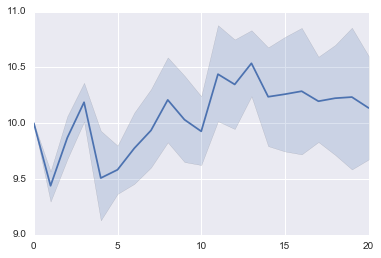

In [150]:
sns.tsplot(y_sim)

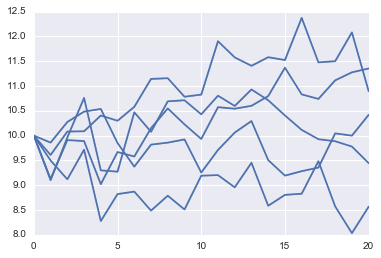

In [151]:
for i in range(N):
    sns.tsplot(y_sim[i])

(2)

In [156]:
T = len(df2)
dataex2 = {"T":T, "Y":df2.Y, "T_pred":8}
fitex2 = pystan.stan(file="stan/ex2.stan",data=dataex2,seed=1234)

In [157]:
fitex2

Inference for Stan model: anon_model_0ee24302e51be5ea618669d942f4ca72.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                 mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[0]           18.41  9.6e-3   0.61  17.21   18.0  18.42  18.83  19.58   4000    1.0
mu[1]           18.54  8.0e-3   0.46  17.58  18.25  18.55  18.83  19.41   3326    1.0
mu[2]           18.51  9.8e-3   0.46   17.6  18.22   18.5  18.81  19.43   2215    1.0
mu[3]           17.55  8.7e-3   0.43  16.67  17.28  17.56  17.82  18.37   2404    1.0
mu[4]           17.18  6.5e-3   0.41  16.37   16.9  17.17  17.44  18.01   4000    1.0
mu[5]           16.79  6.4e-3   0.41  15.99  16.53  16.79  17.06  17.59   4000    1.0
mu[6]           16.18  6.8e-3   0.43  15.36  15.91  16.17  16.46  17.04   4000    1.0
mu[7]           16.26  7.6e-3   0.42  15.45  15.99  16.26  16.53   17.1   3097    1.0
mu[8]            15.8  6.5e-3   0.41 

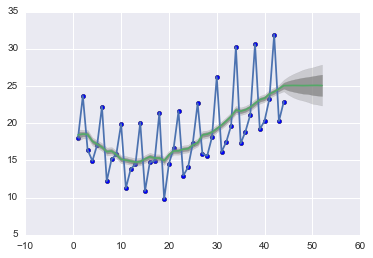

In [162]:
ms2 = fitex2.extract()
y_pred_2 = ms2["y_pred"].T
mu_all_2 =  ms2["mu_all"].T
y2_10, y2_25,y2_50,y2_75,y2_90 = np.percentile(mu_all_2,[10,25,50,75,90],axis=1)
plt.scatter(df2.X, df2.Y)
plt.plot(df2.X, df2.Y)
plt.plot(np.arange(1,53), y2_50)
plt.fill_between(np.arange(1,53), y2_10, y2_90,color="gray", alpha=0.3)
plt.fill_between(np.arange(1,53), y2_25, y2_75,color="gray", alpha=0.7)

(3) 0.3のノイズを入れてやってみる

In [193]:
df_mesh_noise = pd.DataFrame(np.random.normal(df_mesh,0.3))

In [222]:
df_melt = pd.melt(df_mesh_noise)
df_melt["rows"] = np.tile(np.arange(0,16),24)
df_melt["sum"] = df_melt["rows"] + df_melt["variable"]

In [223]:
df_melt.head()

,variable,value,rows,sum
0,0,0.751107,0,0
1,0,1.526554,1,1
2,0,-0.760522,2,2
3,0,2.617782,3,3
4,0,1.347241,4,4


In [229]:
import statsmodels.api as sm
r_init = sm.nonparametric.lowess(df_melt.value, df_melt["sum"])[:,1].reshape(16,24)

In [241]:
dataex3 = {"I":16, "J":24, "Y":df_mesh_noise, "T":df_design.max().max(), "TID":df_design.values}
fitex3 = pystan.stan(file="stan/model12-13b.stan", data=dataex3, init=lambda:{"r":r_init,"s_r":1,"s_Y":1, "s_beta":1, "beta":np.random.normal(0,0.1,96)},
                     seed=1234, chains=4, iter=10000,warmup=200, thin=5)

In [242]:
fitex3

Inference for Stan model: anon_model_d659ea088cd1f287bcbdb9e52153c8bb.
4 chains, each with iter=10000; warmup=200; thin=5; 
post-warmup draws per chain=1960, total post-warmup draws=7840.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
r[0,0]     3.73    0.14    0.2   3.41   3.54   3.77    3.9   3.95      2    nan
r[1,0]     4.12    0.13   0.19   3.85   3.93   4.14   4.29   4.33      2    nan
r[2,0]     4.51    0.13   0.18   4.28   4.32   4.51   4.69   4.72      2    nan
r[3,0]      4.9    0.13   0.19   4.71   4.71   4.89   5.08    5.1      2    nan
r[4,0]     5.29    0.14   0.19   5.04   5.09    5.3   5.48   5.49      2    nan
r[5,0]     5.67    0.15   0.21   5.38   5.47   5.72   5.87   5.87      2    nan
r[6,0]     6.06    0.16   0.23   5.71   5.85   6.14   6.27   6.28      2    nan
r[7,0]     6.45    0.18   0.25   6.05   6.23   6.54   6.67   6.68      2    nan
r[8,0]     6.84     0.2   0.28   6.38   6.61   6.95   7.06   7.09      2    nan
r[9,0]     

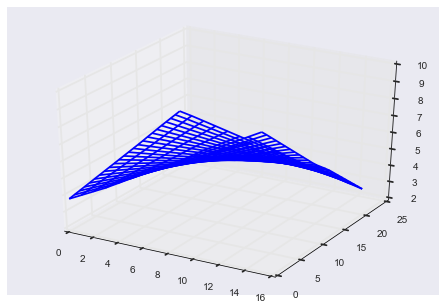

In [243]:
ms8 = fitex3.extract()
r8 = ms8["r"]
Z = np.percentile(r8,[50],axis=0)[0]
x = np.arange(0,16)
y = np.arange(0,24)
X, Y = np.meshgrid(x,y)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X, Y, Z.T)

うーむ。。。

(4)

In [238]:
dataex4 = {"I":16, "J":24, "Y":df_mesh_noise, "T":df_design.max().max(), "TID":df_design.values, "S_s_Y":0.1}
fitex4 = pystan.stan(file="stan/ex4.stan", data=dataex4, init=lambda:{"r":r_init,"s_r":1,"s_Y":1, "s_beta":1, "beta":np.random.normal(0,0.1,96)},
                     seed=1234, chains=4, iter=10000,warmup=200, thin=5)

In [239]:
fitex4

Inference for Stan model: anon_model_921df128fcb27fe518f0b7b5adcc3bd5.
4 chains, each with iter=10000; warmup=200; thin=5; 
post-warmup draws per chain=1960, total post-warmup draws=7840.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
r[0,0]     0.69  5.3e-3   0.41  -0.11   0.42   0.69   0.97    1.5   5968    1.0
r[1,0]     0.86  4.4e-3    0.3   0.27   0.66   0.86   1.06   1.46   4612    1.0
r[2,0]     1.04  4.7e-3   0.28    0.5   0.85   1.04   1.23    1.6   3544    1.0
r[3,0]     1.29  4.6e-3   0.28   0.75    1.1   1.29   1.47   1.83   3533    1.0
r[4,0]     1.59  4.2e-3   0.28   1.04    1.4   1.59   1.77   2.14   4403    1.0
r[5,0]     1.96  4.6e-3   0.29    1.4   1.77   1.96   2.15   2.53   3845    1.0
r[6,0]      2.4  5.3e-3    0.3   1.83    2.2    2.4    2.6    3.0   3184    1.0
r[7,0]     2.89  5.6e-3    0.3   2.31    2.7   2.89   3.09    3.5   2859    1.0
r[8,0]     3.41  5.5e-3   0.29   2.85   3.21   3.41   3.61    4.0   2887    1.0
r[9,0]     

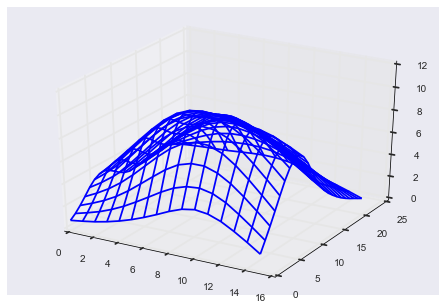

In [240]:
ms8 = fitex4.extract()
r8 = ms8["r"]
Z = np.percentile(r8,[50],axis=0)[0]
x = np.arange(0,16)
y = np.arange(0,24)
X, Y = np.meshgrid(x,y)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X, Y, Z.T)